In [62]:
import json
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd


In [63]:
import matplotlib.pyplot as plt
import numpy as np

def bland_altman_plot(data1, data2, *args, **kwargs):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    mean      = np.mean([data1, data2], axis=0)
    diff      = data1 - data2                   # Difference between data1 and data2
    md        = np.mean(diff)                   # Mean of the difference
    sd        = np.std(diff, axis=0)            # Standard deviation of the difference

    plt.scatter(mean, diff, *args, **kwargs)
    plt.axhline(md,           color='gray', linestyle='--')
    plt.axhline(md + 1.96*sd, color='red', linestyle='--')
    plt.axhline(md - 1.96*sd, color='red', linestyle='--')

In [64]:
importance_pd=pd.read_json("all_norm_Importance.json")
importance_pd

,shap,lime,lgbm,dice_global
cough,0.231779,0.028909,0.071429,0.2
fever,1.000000,0.257437,0.500000,0.5
sore_throat,0.094010,0.123344,0.071429,0.3
shortness_of_breath,0.251110,1.000000,0.857143,1.0
head_ache,0.244096,0.434564,0.142857,0.2
age_60_and_above,0.128136,0.080835,1.000000,0.5
gender,0.044857,0.015971,0.142857,0.2
Contact with confirmed,0.916082,0.603839,0.214286,1.0


In [65]:
import scipy as sc

In [66]:
print(f'the shapiro Test result of shap is :  {sc.stats.shapiro(importance_pd.shap)}')
print(f'the shapiro Test result of lime is :  {sc.stats.shapiro(importance_pd.lime)}')
print(f'the shapiro Test result of lgbm is :  {sc.stats.shapiro(importance_pd.lgbm)}')
print(f'the shapiro Test result of dice global is :  {sc.stats.shapiro(importance_pd.dice_global)}')

the shapiro Test result of shap is :  ShapiroResult(statistic=0.751720666885376, pvalue=0.008534017018973827)
the shapiro Test result of lime is :  ShapiroResult(statistic=0.8607408404350281, pvalue=0.12213249504566193)
the shapiro Test result of lgbm is :  ShapiroResult(statistic=0.803885817527771, pvalue=0.03149785101413727)
the shapiro Test result of dice global is :  ShapiroResult(statistic=0.7931674122810364, pvalue=0.02417793683707714)


In [67]:
# P_ value  dpr shap is smaller that 0.05 --> reject normality assumption
# P_ value  dpr lgbm is smaller that 0.05 --> reject normality assumption
# P_ value  dpr dice global is smaller that 0.05 --> reject normality assumption
# we do logratim transformation


(array([3., 1., 2., 0., 0., 0., 0., 0., 0., 2.]),
 array([0.04485682, 0.14037114, 0.23588545, 0.33139977, 0.42691409,
        0.52242841, 0.61794273, 0.71345705, 0.80897136, 0.90448568,
        1.        ]),
 <BarContainer object of 10 artists>)

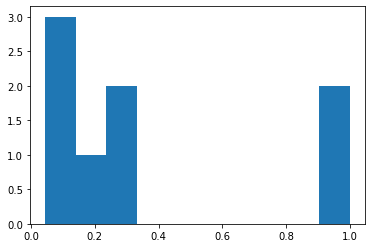

In [68]:
plt.hist(importance_pd.shap)

(array([4., 1., 0., 0., 1., 0., 0., 0., 1., 1.]),
 array([0.07142857, 0.16428571, 0.25714286, 0.35      , 0.44285714,
        0.53571429, 0.62857143, 0.72142857, 0.81428571, 0.90714286,
        1.        ]),
 <BarContainer object of 10 artists>)

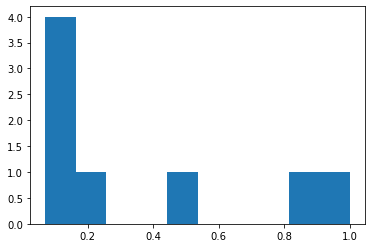

In [69]:
plt.hist(importance_pd.lgbm)

(array([3., 1., 0., 2., 0., 0., 0., 0., 0., 2.]),
 array([0.2 , 0.28, 0.36, 0.44, 0.52, 0.6 , 0.68, 0.76, 0.84, 0.92, 1.  ]),
 <BarContainer object of 10 artists>)

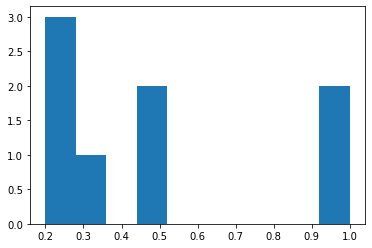

In [70]:
plt.hist(importance_pd.dice_global)

In [71]:
df_sqrt=pd.DataFrame()

In [72]:
df_sqrt["shap_sqrt"]=importance_pd['shap'].apply(lambda x:np.sqrt(x))
df_sqrt["lgbm_sqrt"]=importance_pd['lgbm'].apply(lambda x:np.sqrt(x))
df_sqrt["dice_sqrt"]=importance_pd['dice_global'].apply(lambda x:np.sqrt(x))
print(f'the shapiro Test result of shap_sqrt is :  {sc.stats.shapiro(df_sqrt["shap_sqrt"])}')
print(f'the shapiro Test result of lgbm_sqrt is :  {sc.stats.shapiro(df_sqrt["lgbm_sqrt"])}')
print(f'the shapiro Test result of dice_sqrt is :  {sc.stats.shapiro(df_sqrt["dice_sqrt"])}')

the shapiro Test result of shap_sqrt is :  ShapiroResult(statistic=0.8536351919174194, pvalue=0.10367494821548462)
the shapiro Test result of lgbm_sqrt is :  ShapiroResult(statistic=0.8569298982620239, pvalue=0.11188535392284393)
the shapiro Test result of dice_sqrt is :  ShapiroResult(statistic=0.8278561234474182, pvalue=0.05639297142624855)


In [73]:
df_sqrt

,shap_sqrt,lgbm_sqrt,dice_sqrt
cough,0.481434,0.267261,0.447214
fever,1.000000,0.707107,0.707107
sore_throat,0.306610,0.267261,0.547723
shortness_of_breath,0.501109,0.925820,1.000000
head_ache,0.494060,0.377964,0.447214
age_60_and_above,0.357961,1.000000,0.707107
gender,0.211794,0.377964,0.447214
Contact with confirmed,0.957122,0.462910,1.000000


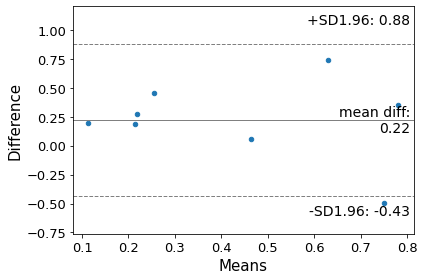

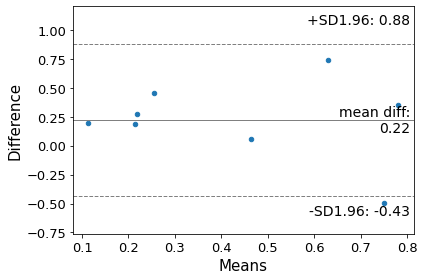

In [75]:
sm.graphics.mean_diff_plot(df_sqrt.shap_sqrt,importance_pd.lime)


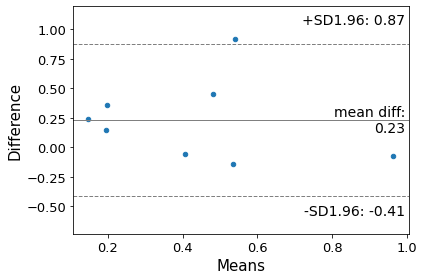

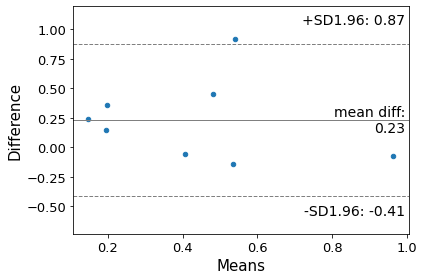

In [76]:
sm.graphics.mean_diff_plot(df_sqrt.lgbm_sqrt,importance_pd.lime)


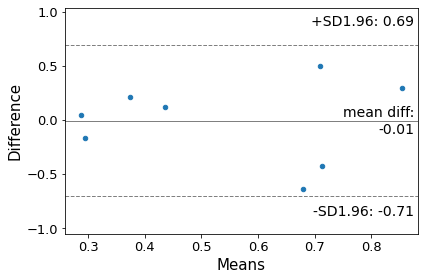

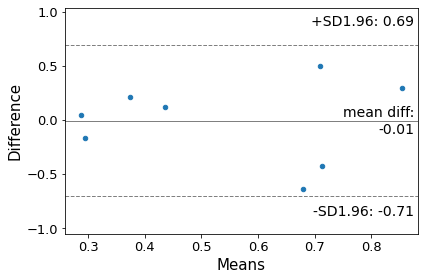

In [80]:
sm.graphics.mean_diff_plot(df_sqrt.shap_sqrt,df_sqrt.lgbm_sqrt)